In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
data = data.drop_duplicates()
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [5]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


In [6]:
#features data, X/independent variables
X = data.iloc[:,0:4]
X.head()

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [7]:
#dependent variable/y
#y = data.iloc[:,5:5] Doesn't work, nor does 
#y = data[5:4]
y = data['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [8]:
y.tail()

79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, dtype: int64

In [9]:
#Splitting data for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=123)

In [10]:
#modeling (classification)
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)

In [11]:
#predictions
preds = model.predict(X_test)

In [12]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



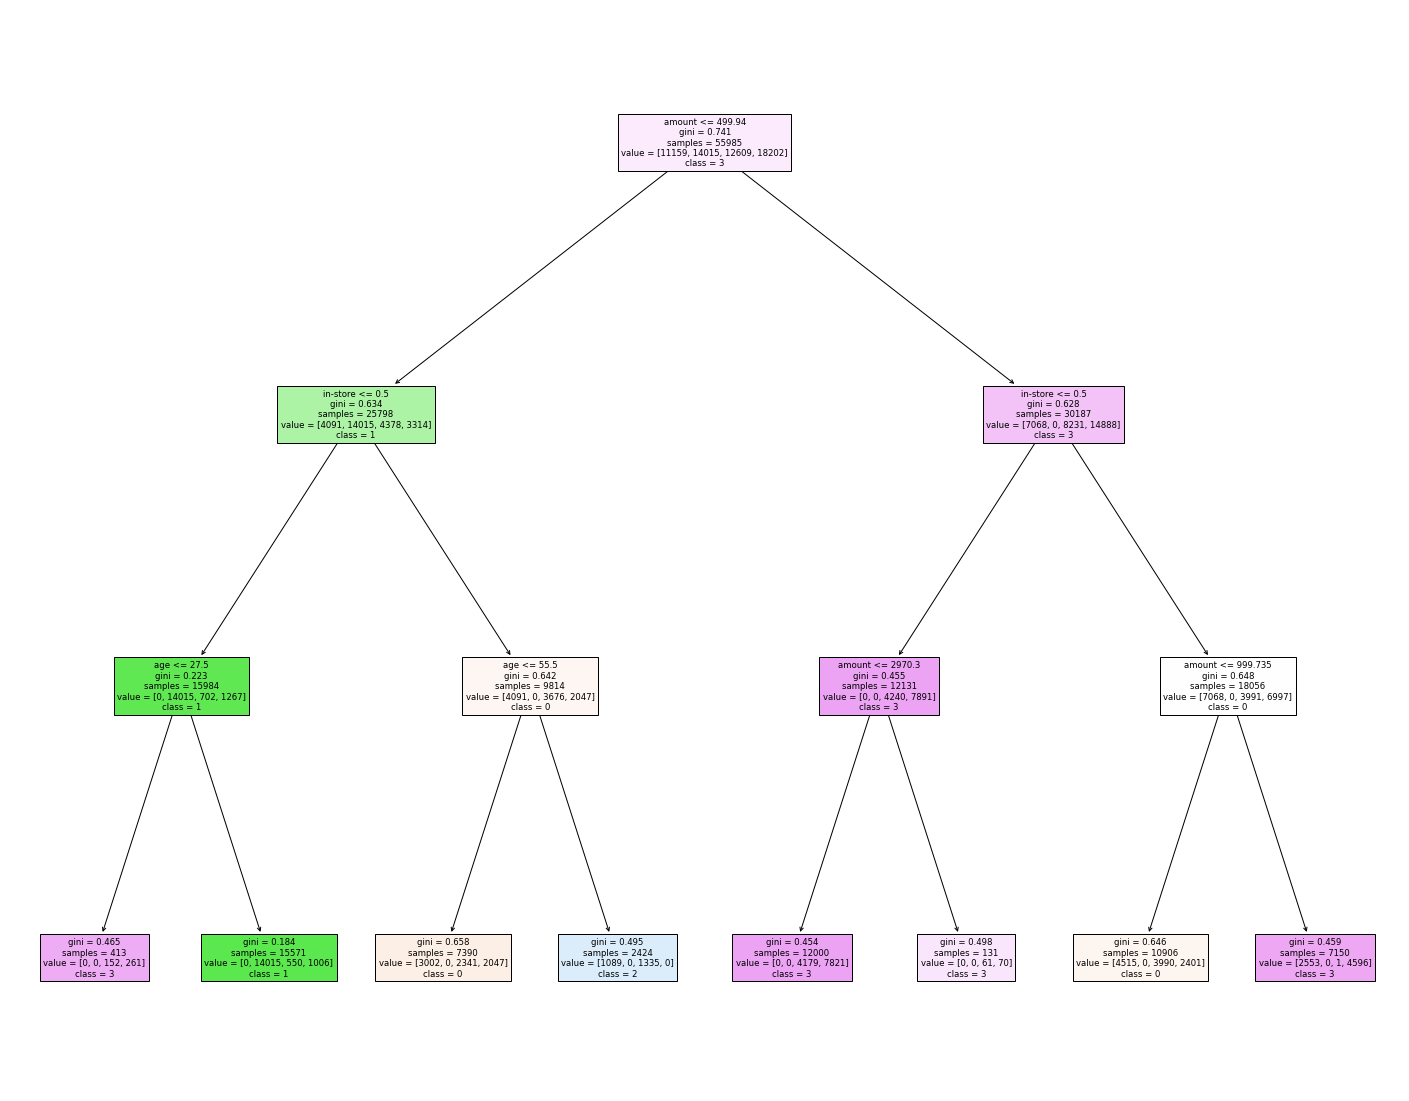

In [13]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, class_names=['0','1','2','3'], filled=True, max_depth=11)

In [14]:
#Max depth of none doesn't halt in a timely manner, nor did 13
#Built up from max depth of 5, and 11 is about as long a time as I'm willing to take.


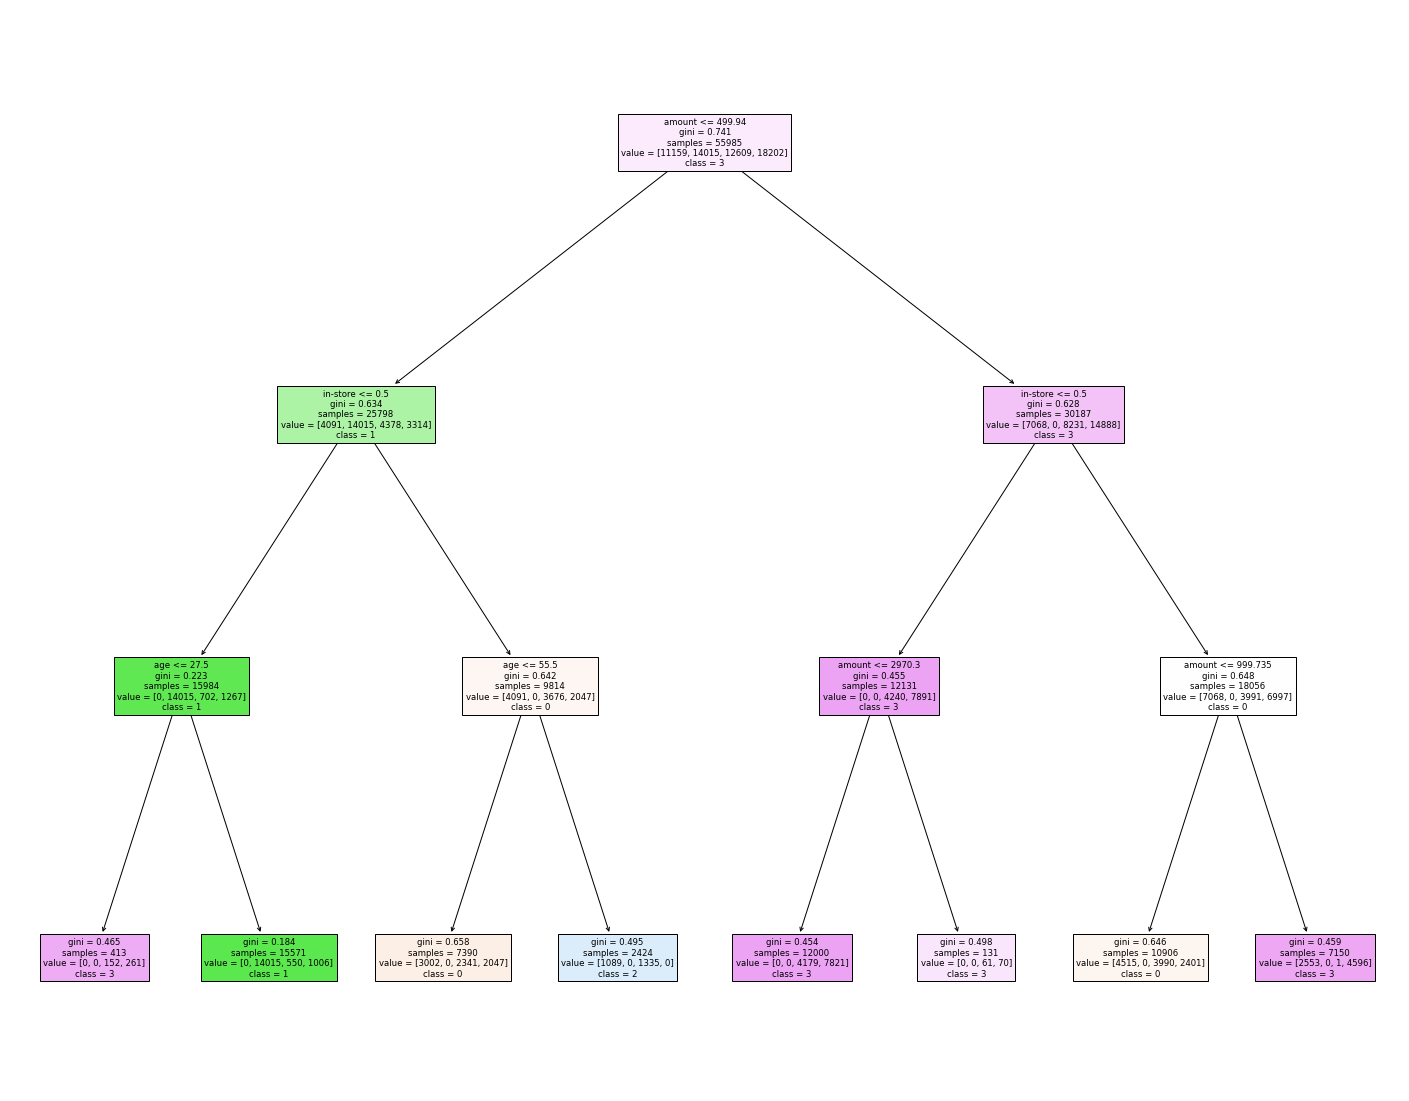

In [15]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns, filled=True, class_names=['0','1','2','3'], max_depth=3)

In [16]:
#Decision Tree classifier based on region, predictive to about 56%
#rises to 64% with depth of 3


In [18]:
model = DecisionTreeClassifier(max_depth=3)
result = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
print('Decision Tree Classifier', result.mean())
model = RandomForestClassifier(max_depth=3)
result = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
print('Random Forest Classifier', result.mean())
model = GradientBoostingClassifier(max_depth=3)
result = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
print('Gradient Boosting Classifier', result.mean())

Decision Tree Classifier 0.636063233542851
Random Forest Classifier 0.6349379187218356
Gradient Boosting Classifier 0.6442261426204614
